In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [7]:
titanic = sns.load_dataset('titanic')

# Drop rows with missing values for simplicity
titanic = titanic.dropna(subset=['age', 'embarked'])

# Convert categorical variables to dummy/indicator variables
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']]
y = titanic['survived']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier(random_state=42, max_depth=3)
dtree.fit(X_train, y_train)

accuracy = dtree.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


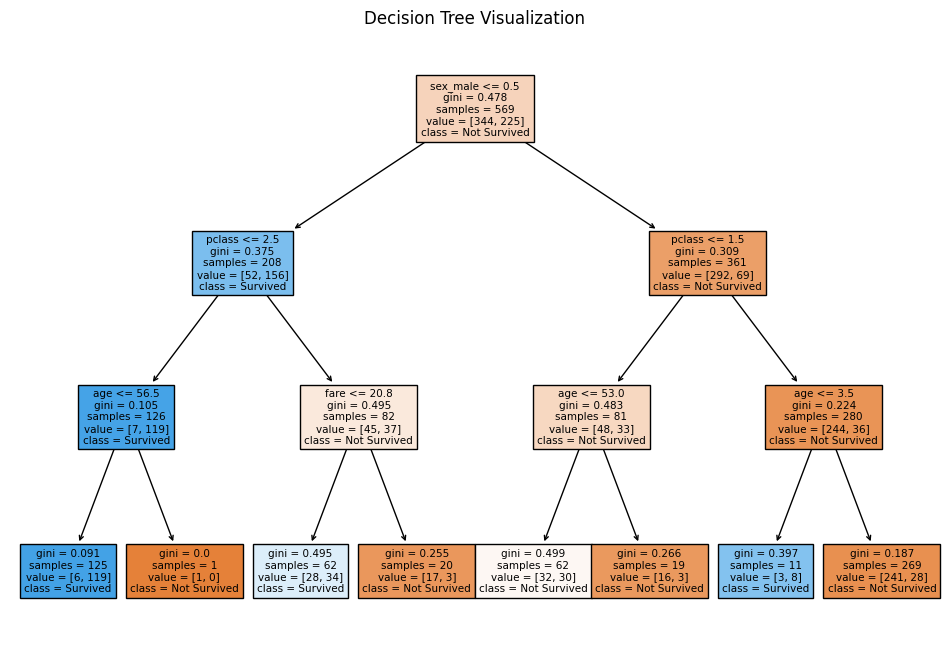

In [14]:
plt.figure(figsize=(12,8))
plot_tree(dtree, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [16]:
param_grid = {
    'max_features': [2,5,10],
    'max_leaf_nodes': [2, 5, 10],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # 5-fold cross-validation
                           verbose=1,  # Verbosity level
                           n_jobs=-1)  # Use all available cores

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': [2, 5, 10],
                         'max_leaf_nodes': [2, 5, 10],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [10, 20, 50]},
             scoring='accuracy', verbose=1)

In [17]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)

# Evaluate the best model
best_accuracy = best_model.score(X_test, y_test)
print(f"Best Model Accuracy: {best_accuracy:.2f}")

Best parameters found:  {'max_features': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best Model Accuracy: 0.78


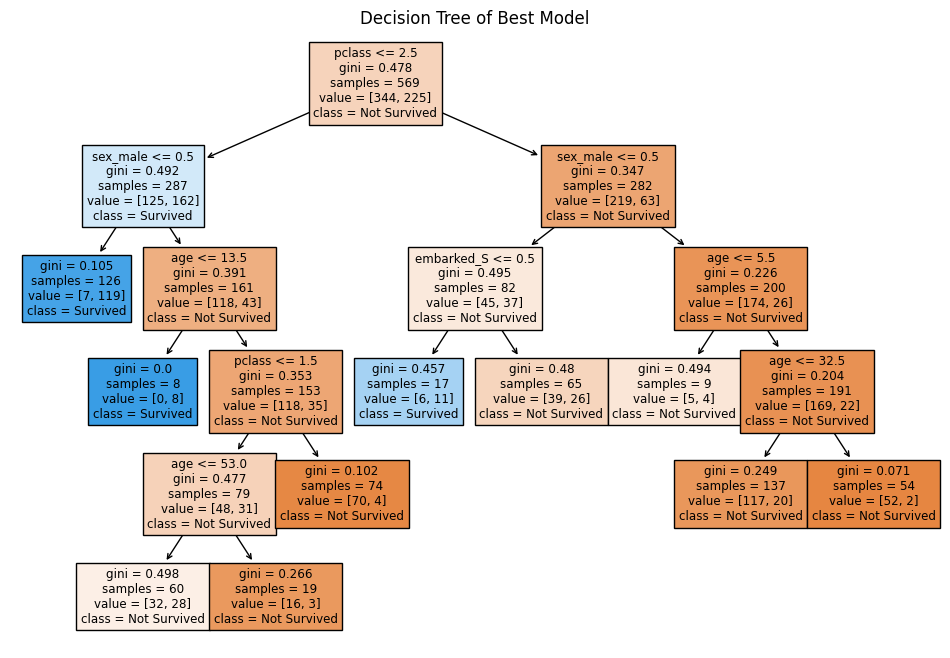

In [18]:
plt.figure(figsize=(12, 8))
plot_tree(best_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree of Best Model")
plt.show()